패키지 참조 -> 데이터 셋 준비 -> 데이터 전처리 -> 탐색적 데이터 분석 -> 데이터 셋 분할 -> 모델 개발 -> 학습 결과 평가 -> 학습 결과 적용

![res/code.png](res/code.png)

분석 프로세스를 진행한 이유와 해당 프로세서를 통해 얻은 결론을 설명
- 모든 단계는 목적과 근거를 제시

# 단순 선형 회귀

## #01. 패키지

In [20]:
import sys
sys.path.append("../../")
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

## #02. 데이터 준비

In [21]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## #03. 데이터 전처리

### 결측치 확인

In [22]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

## #04. 탐색적 데이터 분석

### 기초통계 확인

describe

In [23]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### 산점도 그래프와 추세선 확인

산점도, 추세선 확인 이유
- 단순선형, 다항식으로 갈지 여부를 결정 -> 곡선인 경우 다항식으로 분석
- 즉, 시각화 자료를 통한 차수 결정

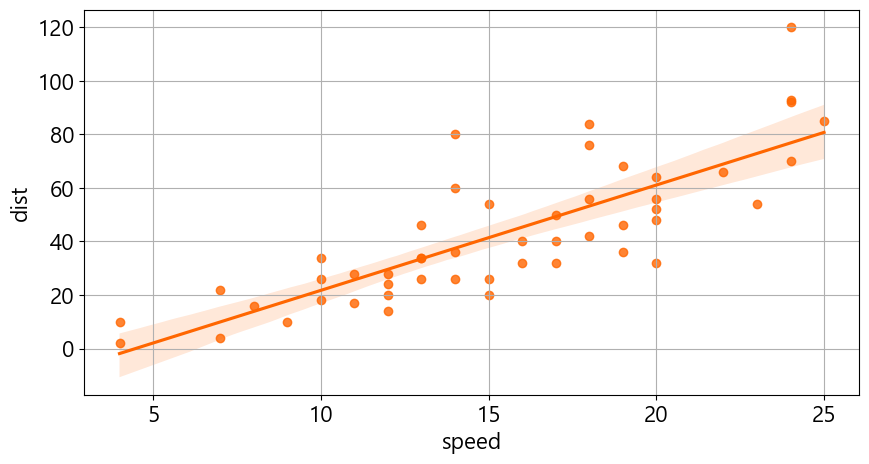

In [24]:
plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

> 곡선보다는 `선형 분포(직선)`에 더 가까우므로 `단순선형회귀모델`을 적용하기로 함

## #05. 데이터셋 분할

### 1. 랜덤시드 고정

In [25]:
np.random.seed(777)

### 2. 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

데이터프레임은 2차원 형식

In [26]:
# (행 수, 열 수)
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터 크기 :", x.shape, "/ 레이블 크기 :", y.shape)

훈련데이터 크기 : (50, 1) / 레이블 크기 : (50,)


### 3. 훈련 데이터와 검증 데이터로 분할

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기 : %d, 검증용 데이터셋 크기 : %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기 : 35, 검증용 데이터셋 크기 : 15


In [28]:
# 본인 추가 - 객체 확인
print("y_test :",type(y_test), "/", "x_test :", type(x_test))

y_test : <class 'pandas.core.series.Series'> / x_test : <class 'pandas.core.frame.DataFrame'>


## #06. 모델 개발

### 1. 모델 정의

- input_shape은 독립변수 수
- Dense 신경망 개수의 수에 따라서 모델의 성능에 차이가 발생
    - 직감으로 맞춤(다른 방법 없음) 보통 16 또는 32 이상
    - 최적의 값을 직접 탐색(단, 너무 크면 컴퓨터 다운)
- activation은 모델과 분석 종류에 따라서 다름 
    - 보통은 relu, 분류는 sigmoid, 회귀는 linear
- optimizer은 모르면 Adam 사용
- epochs는 많아도 크게 상관이 없음(단, 너무 크면 오래 걸림)
- 2차항을 하고 싶다면 sklearn으로 2차항 생성 후 Sequential에 입력

In [29]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

- epochs는 많아도 크게 상관이 없음(단, 너무 크면 오래 걸림)

In [30]:
result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300


2/2 [==============================] - 6s 1s/step - loss: 3022.0977 - mae: 47.5628 - val_loss: 2117.5930 - val_mae: 40.4596
Epoch 2/300
2/2 [==============================] - 0s 166ms/step - loss: 2997.7075 - mae: 47.3457 - val_loss: 2099.9329 - val_mae: 40.2654
Epoch 3/300
2/2 [==============================] - 0s 155ms/step - loss: 2974.3499 - mae: 47.1289 - val_loss: 2082.4722 - val_mae: 40.0724
Epoch 4/300
2/2 [==============================] - 0s 200ms/step - loss: 2950.3032 - mae: 46.9123 - val_loss: 2065.1431 - val_mae: 39.8800
Epoch 5/300
2/2 [==============================] - 0s 171ms/step - loss: 2927.9780 - mae: 46.6995 - val_loss: 2048.1858 - val_mae: 39.6908
Epoch 6/300
2/2 [==============================] - 0s 284ms/step - loss: 2905.2971 - mae: 46.4905 - val_loss: 2031.8347 - val_mae: 39.5076
Epoch 7/300
2/2 [==============================] - 0s 233ms/step - loss: 2883.2263 - mae: 46.2849 - val_loss: 2015.9083 - val_mae: 39.3283
Epoch 8/300
2/2 [=========================

### 학습결과 시각화

In [31]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae
epochs,,,,
1,3022.097656,47.562813,2117.593018,40.459633
2,2997.707520,47.345730,2099.932861,40.265385
3,2974.349854,47.128918,2082.472168,40.072430
4,2950.303223,46.912292,2065.143066,39.880013
5,2927.978027,46.699459,2048.185791,39.690842
...,...,...,...,...
296,282.965973,12.964291,241.206650,12.021497
297,282.612823,12.964712,241.273499,12.032885
298,282.379883,12.966637,241.312729,12.039424


## #07. 학습 결과 평가

### 1. 학습 결과 시각화

시각화 결과가 모이지 않으면 `과적합`이므로 `스케일링 또는 데이터 추가`로 개선

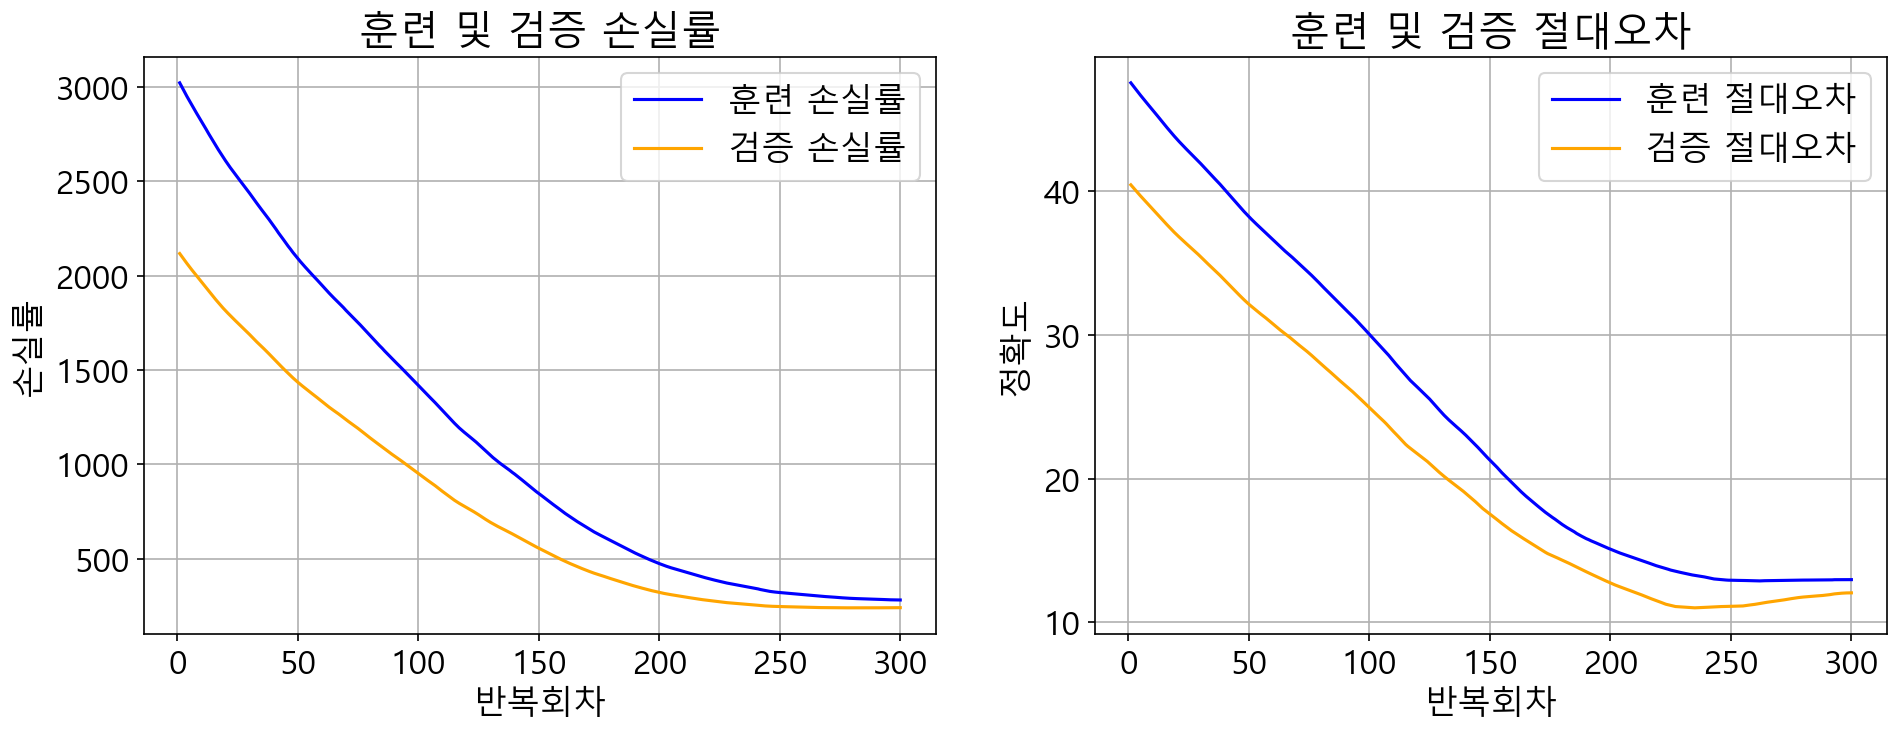

In [32]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

### 2. 모델 성능 평가

In [33]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 21ms/step - loss: 282.0294 - mae: 12.9659
최종 훈련 손실률: 282.029388, 최종 훈련 절대오차: 12.965930
1/1 [==============================] - 0s 137ms/step - loss: 241.3457 - mae: 12.0451
최종 검증 손실률: 241.345703, 최종 검증 절대오차: 12.045056


## #08. 학습 결과 적용

`통계`는 `데이터의 경향을 설명`, `머신러닝`은 `미래의 값을 예측`하는 것이 목적

### 1. 테스트 데이터에 대한 예측 결과 산정

In [34]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 272ms/step
[[63.573452]
 [36.735172]
 [34.051342]
 [31.36751 ]
 [52.838142]
 [39.419   ]
 [39.419   ]
 [50.154312]
 [34.051342]
 [52.838142]
 [39.419   ]
 [55.521973]
 [20.632198]
 [36.735172]
 [12.580714]]


### 2. 결과 데이터 셋 구성

In [35]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [36]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,   #y_test를 Series 형태
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,63.573452,-9.573452
17,13,34,36.735172,-2.735172
11,12,14,34.051342,-20.051342
9,11,17,31.367510,-14.367510
36,19,46,52.838142,-6.838142
21,14,60,39.418999,20.581001
22,14,80,39.418999,40.581001
31,18,42,50.154312,-8.154312
12,12,20,34.051342,-14.051342
37,19,68,52.838142,15.161858


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

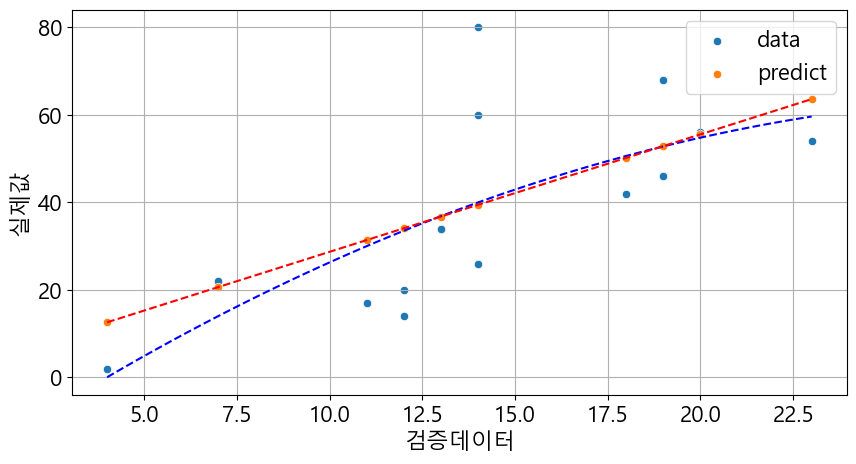

In [37]:
# 붉은색 - 예측 값, 푸른색 - 실제 값
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

### 3. 임의의 값에 대한 머신러닝 예측 결과

`통계`는 `데이터의 경향을 설명`, `머신러닝`은 `미래의 값을 예측`하는 것이 목적

In [38]:
my_speed = 50   #속력이 50인 경우의 제동거리
results = model.predict([[my_speed]])
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 496ms/step
속도가 50인 자동차의 제동거리는 136로 예상됩니다.
